In [2]:
import pickle

with open("demographic_data/1.0-shapefile-codebook/usa/usa.pkl", "rb") as f:
    usa_df = pickle.load(f)

In [3]:
import pandas as pd

output = pd.read_csv("output.csv")

output

plant_name  plant_code        county state  \
0                            Lamar Plant         508       Prowers    CO   
1                               Big Bend         645  Hillsborough    FL   
2                           Medicine Bow         692        Carbon    WY   
3                                Willmar        2022     Kandiyohi    MN   
4                 Searsburg Wind Turbine        7381    Bennington    VT   
...                                  ...         ...           ...   ...   
5090                  Longbow Solar, LLC       65521      Brazoria    TX   
5091  CA - Fresno County - Juvenile Hall       65528        Fresno    CA   
5092                             Baldwin       65532    Cumberland    ME   
5093                             Augusta       65533      Kennebec    ME   
5094                            Monmouth       65534      Kennebec    ME   

      capacity tech_type  op_year  \
0          4.5        WT     2004   
1         19.8        PV     2017   
2          4.9        WT     2000   
3          2.0        WT     2009   
4          6.0        WT     1997   
...        ...       ...      ...   
5090      78.1        PV     2022   
5091       2.8        PV     2022   
5092       5.0        PV     2022   
5093       2.5        PV     2022   
5094       5.0        PV     2022   

                                           search_query        lat  \
0     Lamar Plant Wind Prowers County Colorado contr...  38.033327   
1     Big Bend Solar Hillsborough County Florida con...  27.794400   
2     Medicine Bow Wind Carbon County Wyoming contro...  41.835278   
3     Willmar Wind Kandiyohi County Minnesota contro...  45.121705   
4     Searsburg Wind Turbine Bennington County Vermo...  42.862500   
...                                                 ...        ...   
5090  Longbow Solar, Brazoria County Texas controver...  29.289809   
5091  CA - Fresno County - Juvenile Hall Solar Fresn...  36.661113   
5092  Baldwin Solar Cumberland County Maine controve...  43.793220   
5093  Augusta Solar Kennebec County Maine controvers...  44.361240   
5094  Monmouth Solar Kennebec County Maine controver...  44.192188   

            long  ...                                     search_results  \
0    -102.537915  ...  {'general': {'search_engine': 'google', 'resul...   
1     -82.403600  ...  {'general': {'search_engine': 'google', 'resul...   
2    -106.242778  ...  {'general': {'search_engine': 'google', 'resul...   
3     -95.053236  ...  {'general': {'search_engine': 'google', 'resul...   
4     -72.962800  ...  {'general': {'search_engine': 'google', 'resul...   
...          ...  ...                                                ...   
5090  -95.298609  ...  {'general': {'search_engine': 'google', 'resul...   
5091 -119.725975  ...  {'general': {'search_engine': 'google', 'resul...   
5092  -70.756850  ...  {'general': {'search_engine': 'google', 'resul...   
5093  -69.796360  ...  {'general': {'search_engine': 'google', 'resul...   
5094  -70.021685  ...  {'general': {'search_engine': 'google', 'resul...   

                                      article_relevance  \
0     {'scores_and_justifications': [{'article_lette...   
1     {'scores_and_justifications': [{'article_lette...   
2     {'scores_and_justifications': [{'article_lette...   
3     {'scores_and_justifications': [{'article_lette...   
4     {'scores_and_justifications': [{'article_lette...   
...                                                 ...   
5090  {'scores_and_justifications': [{'article_lette...   
5091  {'scores_and_justifications': [{'article_lette...   
5092  {'scores_and_justifications': [{'article_lette...   
5093  {'scores_and_justifications': [{'article_lette...   
5094  {'scores_and_justifications': [{'article_lette...   

                                       relevant_content  \
0     {'full_text': '<doc>\nArticle Letter: A\nLawsu...   
1     {'full_text': '<doc>\nArticle Letter: A\nTampa...   
2     {'full_text': '<doc>\nArti

In [5]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the output DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(output['long'], output['lat'])]
output_gdf = gpd.GeoDataFrame(output, geometry=geometry)

# Ensure the coordinate reference system (CRS) matches for both GeoDataFrames
output_gdf.set_crs(usa_df.crs, inplace=True)

# Perform the spatial join
joined_data = gpd.sjoin(output_gdf, usa_df, how="inner", op='intersects')

# Display the joined data
joined_data


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


plant_name  plant_code        county state  \
0                            Lamar Plant         508       Prowers    CO   
118          Colorado Green Holdings LLC       56173       Prowers    CO   
2757                 Twin Buttes II Wind       61040       Prowers    CO   
1                               Big Bend         645  Hillsborough    FL   
2                           Medicine Bow         692        Carbon    WY   
...                                  ...         ...           ...   ...   
5090                  Longbow Solar, LLC       65521      Brazoria    TX   
5091  CA - Fresno County - Juvenile Hall       65528        Fresno    CA   
5092                             Baldwin       65532    Cumberland    ME   
5093                             Augusta       65533      Kennebec    ME   
5094                            Monmouth       65534      Kennebec    ME   

      capacity tech_type  op_year  \
0          4.5        WT     2004   
118      162.0        WT     2003   
2757      75.0        WT     2017   
1         19.8        PV     2017   
2          4.9        WT     2000   
...        ...       ...      ...   
5090      78.1        PV     2022   
5091       2.8        PV     2022   
5092       5.0        PV     2022   
5093       2.5        PV     2022   
5094       5.0        PV     2022   

                                           search_query        lat  \
0     Lamar Plant Wind Prowers County Colorado contr...  38.033327   
118   Colorado Green Holdings Wind Prowers County Co...  37.703300   
2757  Twin Buttes II Wind Prowers County Colorado co...  37.773000   
1     Big Bend Solar Hillsborough County Florida con...  27.794400   
2     Medicine Bow Wind Carbon County Wyoming contro...  41.835278   
...                                                 ...        ...   
5090  Longbow Solar, Brazoria County Texas controver...  29.289809   
5091  CA - Fresno County - Juvenile Hall Solar Fresn...  36.661113   
5092  Baldwin Solar Cumberland County Maine controve...  43.793220   
5093  Augusta Solar Kennebec County Maine controvers...  44.361240   
5094  Monmouth Solar Kennebec County Maine controver...  44.192188   

            long  ...  DM_O AGE_10 AGE_MIDDLE AGE_OLD TA_COU_116  TA_COUNT_C  \
0    -102.537915  ...  0.00   0.16       0.62    0.21        NaN        None   
118  -102.623100  ...  0.00   0.16       0.62    0.21        NaN        None   
2757 -102.546000  ...  0.00   0.16       0.62    0.21        NaN        None   
1     -82.403600  ...  0.16   0.17       0.75    0.07        NaN        None   
2    -106.242778  ...  0.00   0.09       0.67    0.22        NaN        None   
...          ...  ...   ...    ...        ...     ...        ...         ...   
5090  -95.298609  ...  0.02   0.12       0.71    0.16        NaN        None   
5091 -119.725975  ...  0.14   0.17       0.70    0.12        NaN        None   
5092  -70.756850  ...  0.00   0.07       0.69    0.22        NaN        None   
5093  -69.796360  ...  0.00   0.07       0.69    0.22        NaN        None   
5094  -70.021685  ...  0.00   0.10       0.73    0.16        NaN        None   

      TA_PERC  TA_PERC_FE  UI_EXP THRHLD  
0         NaN         NaN  Nation     21  
118       NaN         NaN  Nation     21  
2757      NaN         NaN  Nation     21  
1         NaN         NaN  Nation     21  
2         NaN         NaN  Nation     21  
...       ...         ...     ...    ...  
5090      NaN         NaN  Nation     21  
5091      NaN         NaN  Nation     21  
5092      NaN         NaN  Nation     21  
5093      NaN         NaN  Nation     21  
5094      NaN         NaN  Nation     21  

[5095 rows x 146 columns]

In [13]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import matplotlib

# Create a base map
map = folium.Map(location=[joined_data['lat'].mean(), joined_data['long'].mean()], zoom_start=5)

# Variable to be plotted
indepdent_var = 'AGE_OLD'

# Normalize the AGE_OLD column for color mapping
age_norm = plt.Normalize(vmin=joined_data[indepdent_var].min(), vmax=joined_data[indepdent_var].max())

# Create a color map
cmap = plt.cm.viridis

# Convert colors to hex format for folium
joined_data['color'] = [matplotlib.colors.rgb2hex(cmap(age_norm(value))) for value in joined_data[indepdent_var]]

# Add points to the map
for idx, row in joined_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        popup=f"{indepdent_var}: {row[indepdent_var]}"  # Show AGE_OLD value on click
    ).add_to(map)

# Add a color map legend to the map


# Display the map
map

In [10]:
len(joined_data[joined_data["AGE_MIDDLE"].isnull()])

25

In [14]:
joined_data.to_pickle("full_dataset_analysis.pkl")

In [19]:
joined_data['article_relevance'][0]

"{'scores_and_justifications': [{'article_letter': 'A', 'grade': 1, 'justification': 'Unrelated lawsuit, not about wind project'}, {'article_letter': 'B', 'grade': 2, 'justification': 'Mentions wind energy, not specific project'}, {'article_letter': 'C', 'grade': 1, 'justification': 'Lawsuit not about wind project'}, {'article_letter': 'D', 'grade': 1, 'justification': 'General zoning, not specific to project'}, {'article_letter': 'E', 'grade': 1, 'justification': 'Public hearing, no project details'}, {'article_letter': 'F', 'grade': 1, 'justification': 'Fire incident, unrelated to wind project'}, {'article_letter': 'G', 'grade': 1, 'justification': 'General mitigation, not specific project'}, {'article_letter': 'H', 'grade': 1, 'justification': 'General maintenance, not project narrative'}, {'article_letter': 'I', 'grade': 3, 'justification': 'Mentions specific projects, no opposition/support'}, {'article_letter': 'J', 'grade': 1, 'justification': 'General county news, not about proj

In [3]:
import pickle

with open("full_dataset_analysis.pkl", "rb") as f:
    joined_data = pickle.load(f)

<Axes: >

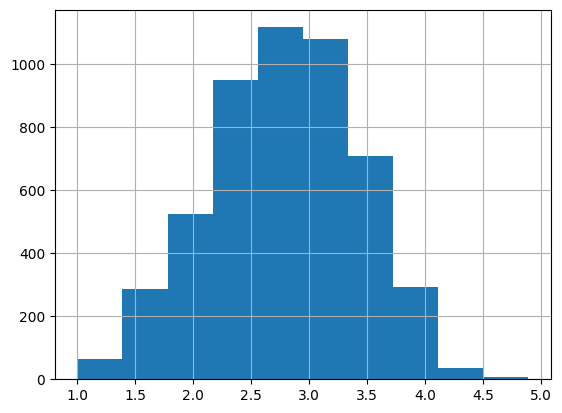

In [18]:
import json
import os

# Function to calculate the average score from the 'article_relevance' column
def calculate_avg_score(plant_code):
    path = f"results/article_relevance/{plant_code}.json"

    if not os.path.exists(path):
        return None

    with open(path, "r") as f:
        relevance_data = json.load(f)

    try:
        if relevance_data == []:
            return None
        scores = [item['grade'] for item in relevance_data.get('scores_and_justifications', [])]
    except:
        print(plant_code)
        print(scores)

    if scores:
        return sum(scores) / len(scores)
    else:
        return None

# Apply the function to each row in the 'article_relevance' column and store the result in a new column
joined_data['avg_relevance_score'] = joined_data['plant_code'].apply(calculate_avg_score)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
VIZ_DIR = "/Users/anushreechaudhuri/pCloud Drive/MIT/MIT Work/Renewable Energy UROP/dispute-characterization/visualizations"
from os.path import join as opj
viz_path = lambda x: opj(VIZ_DIR, x)

/var/folders/m5/0x0gwbxx1kz02qrmghysp2mw0000gn/T/ipykernel_85877/1084965904.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(joined_data['avg_relevance_score'].dropna(), bins=20, kde=True)


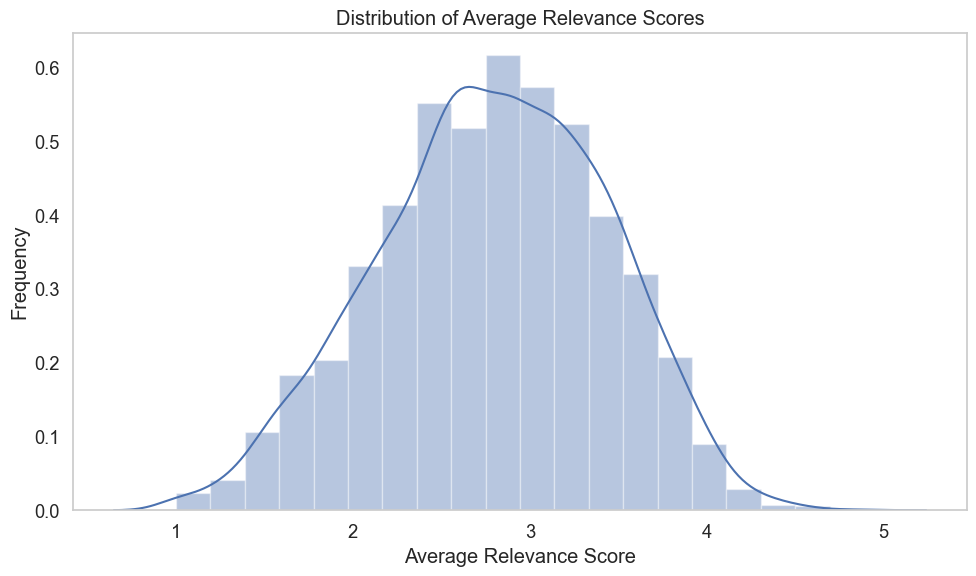

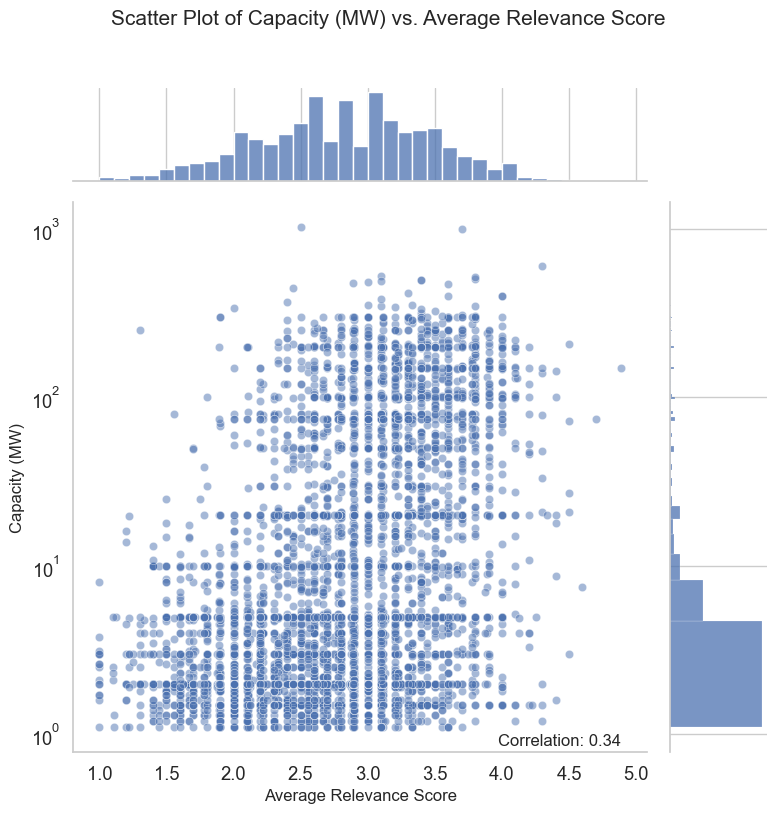

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that avg_relevance_score is numeric
joined_data['avg_relevance_score'] = pd.to_numeric(joined_data['avg_relevance_score'], errors='coerce')

# Plotting the distribution of average relevance scores
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.grid(False)
ax = sns.distplot(joined_data['avg_relevance_score'].dropna(), bins=20, kde=True)
ax.set_title('Distribution of Average Relevance Scores')
ax.set_xlabel('Average Relevance Score')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig(viz_path("avg_relevance_score_distribution.png"), bbox_inches='tight')

# Plotting scatter plot of avg_relevance_score vs. "capacity"
import numpy as np
from scipy.stats import pearsonr

# Prepare the data
x = joined_data['avg_relevance_score'].dropna()
y = joined_data.loc[x.index, 'capacity']

# Calculate the correlation coefficient
correlation_coef, _ = pearsonr(x, y)

# Create the jointplot
g = sns.jointplot(x='avg_relevance_score', y='capacity', data=joined_data, kind='scatter', height=8, ratio=5, space=0.2, alpha=0.5)
g.ax_joint.set_yscale('log')

# Enhance the plot with titles and labels
plt.suptitle('Scatter Plot of Capacity (MW) vs. Average Relevance Score', fontsize=15, fontname='Arial', y=1.02)
plt.xlabel('Average Relevance Score', fontsize=12, fontname='Arial')
plt.ylabel('Capacity (MW)', fontsize=12, fontname='Arial')
plt.grid(False)

# Display the correlation coefficient on the plot
g.ax_joint.text(x.max(), y.min() * 0.75, f'Correlation: {correlation_coef:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.savefig(viz_path("capacity_relevance_joint_dist.png"), bbox_inches='tight')



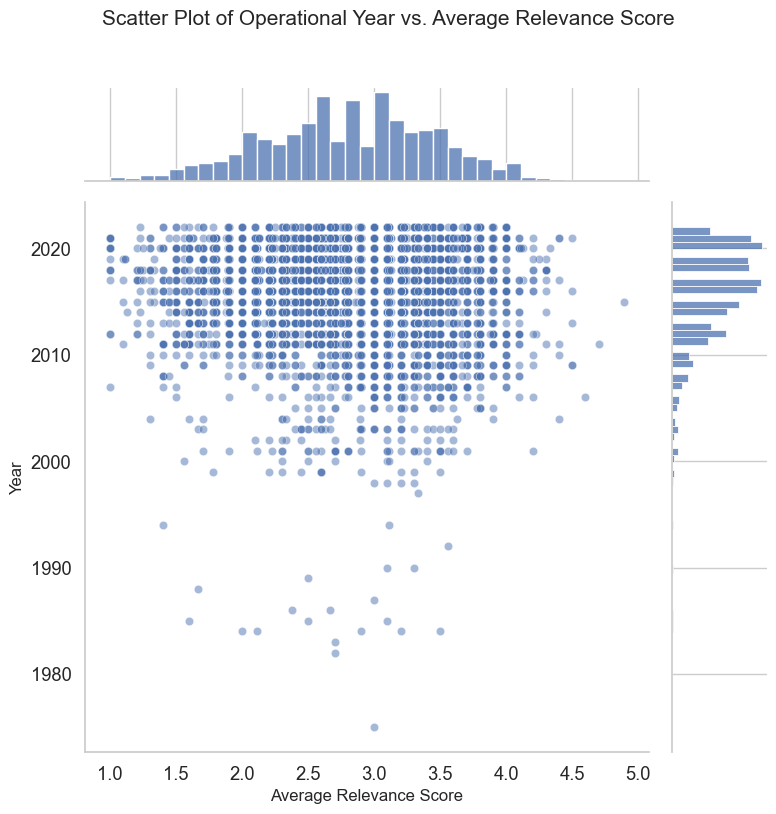

In [47]:

import numpy as np
from scipy.stats import pearsonr

# Prepare the data
x = joined_data['avg_relevance_score'].dropna()
y = joined_data.loc[x.index, 'op_year']

# Calculate the correlation coefficient
correlation_coef, _ = pearsonr(x, y)

# Create the jointplot
g = sns.jointplot(x='avg_relevance_score', y='op_year', data=joined_data, kind='scatter', height=8, ratio=5, space=0.2, alpha=0.5)

# Enhance the plot with titles and labels
plt.suptitle('Scatter Plot of Operational Year vs. Average Relevance Score', fontsize=15, fontname='Arial', y=1.02)
plt.xlabel('Average Relevance Score', fontsize=12, fontname='Arial')
plt.ylabel('Year', fontsize=12, fontname='Arial')
plt.grid(False)

# # Display the correlation coefficient on the plot
# g.ax_joint.text(x.max(), y.min(), f'Correlation: {correlation_coef:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.savefig(viz_path("op_year_relevance_joint_dist.png"), bbox_inches='tight')



In [48]:
import os
import json

# Directory where JSON files are stored
json_dir = 'results/scores'

# Iterate over each row in joined_data DataFrame
for index, row in joined_data.iterrows():
    plant_code = row['plant_code']
    json_path = os.path.join(json_dir, f'{plant_code}.json')
    
    # Initialize default values for each column
    default_values = {
        'mention_support_score': None, 'mention_support_sources': None,
        'mention_opp_score': None, 'mention_opp_sources': None,
        'physical_opp': None, 'policy_opp': None, 'legal_opp': None,
        'opinion_opp': None, 'environmental_opp': None, 'participation_opp': None,
        'tribal_opp': None, 'health_opp': None, 'intergov_opp': None,
        'property_opp': None, 'compensation': None, 'delay': None,
        'co_land_use': None, 'narrative': None
    }
    
    # Check if JSON file exists for the plant_code
    if os.path.exists(json_path):
        with open(json_path, 'r') as file:
            data = json.load(file)
            if data == []:
                # If data is empty list, use default None values
                joined_data.loc[index, list(default_values.keys())] = list(default_values.values())
            else:
                # Extract data from the first item in the list
                data = data['all_scores_and_sources'][0]
                
                # Set values for mention_support and mention_opp
                if 'mention_support' in data:
                    joined_data.loc[index, 'mention_support_score'] = data['mention_support'][0]['score']
                    joined_data.loc[index, 'mention_support_sources'] = data['mention_support'][0]['sources']
                if 'mention_opp' in data:
                    joined_data.loc[index, 'mention_opp_score'] = data['mention_opp'][0]['score']
                    joined_data.loc[index, 'mention_opp_sources'] = data['mention_opp'][0]['sources']
                
                # Set values for all other keys
                for key in default_values.keys():
                    if key in data and 'mention_support' not in key and 'mention_opp' not in key:
                        joined_data.loc[index, key] = data[key]
    else:
        # If JSON file does not exist, use default None values
        joined_data.loc[index, list(default_values.keys())] = list(default_values.values())


In [50]:
# Save joined_data df with additional columns to a new pickle file called "full_dataset_analysis_allscores.pkl"
joined_data.to_pickle("full_dataset_analysis_allscores.pkl")

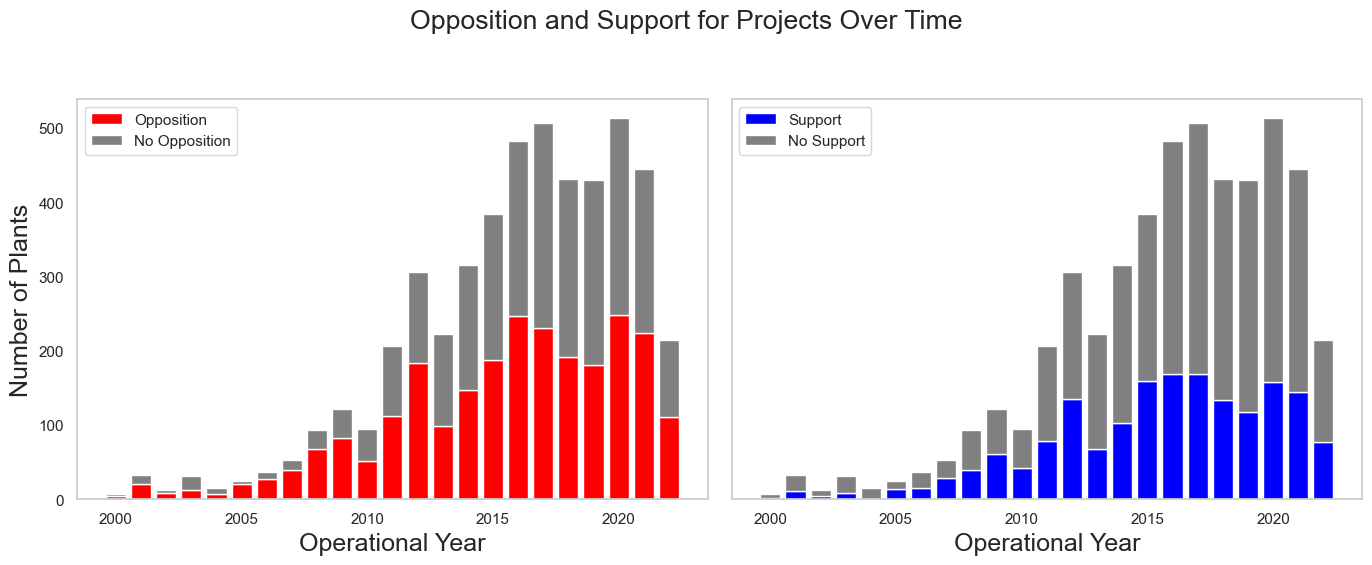

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for years >= 2000
filtered_data = joined_data[joined_data['op_year'] >= 2000]

# Count the number of plants with mention_opp_score == 1 and == 0 by op_year
opp_score_counts = filtered_data.groupby('op_year')['mention_opp_score'].value_counts().unstack(fill_value=0)
opp_score_1 = opp_score_counts[1]
opp_score_0 = opp_score_counts[0]

# Count the number of plants with mention_support_score == 1 and == 0 by op_year
support_score_counts = filtered_data.groupby('op_year')['mention_support_score'].value_counts().unstack(fill_value=0)
support_score_1 = support_score_counts[1]
support_score_0 = support_score_counts[0]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Create an index for each tick position
ind = np.arange(len(opp_score_1))

# Plotting mention_opp_score as stacked bars
ax1.bar(ind, opp_score_1, label='Opposition', color='red')
ax1.bar(ind, opp_score_0, bottom=opp_score_1, label='No Opposition', color='gray')

# Plotting mention_support_score as stacked bars
ax2.bar(ind, support_score_1, label='Support', color='blue')
ax2.bar(ind, support_score_0, bottom=support_score_1, label='No Support', color='gray')

# Set the labels and titles
ax1.set_xlabel('Operational Year')
ax1.set_ylabel('Number of Plants')
ax2.set_xlabel('Operational Year')

# Set a common title for both subplots
fig.suptitle('Opposition and Support for Projects Over Time')

# Set x-ticks to only every 5 years to avoid crowding
ax1.set_xticks(ind[::5])
ax1.set_xticklabels(opp_score_1.index[::5])
ax2.set_xticks(ind[::5])
ax2.set_xticklabels(support_score_1.index[::5])

ax1.legend()
ax2.legend()

# Grid and layout adjustment
ax1.grid(False)
ax2.grid(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to fit the common title

# Save figures to viz_dir
VIZ_DIR = "/Users/anushreechaudhuri/pCloud Drive/MIT/MIT Work/Renewable Energy UROP/dispute-characterization/visualizations"
from os.path import join as opj
viz_path = opj(VIZ_DIR, "mention_scores_by_year.png")
plt.savefig(viz_path)
# Show the plot
plt.show()


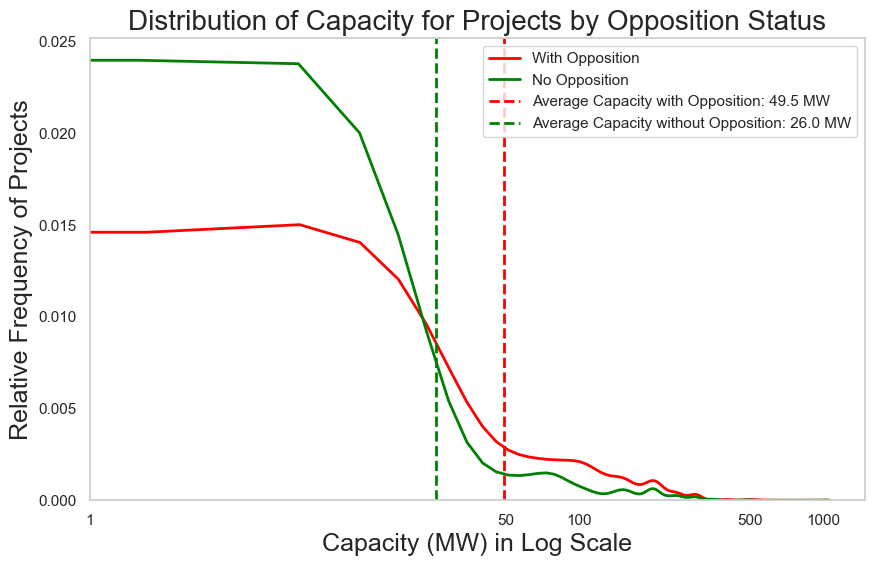

<Figure size 640x480 with 0 Axes>

In [24]:
# Filter data for projects with mention_opp_score == 1
opp_data = joined_data[joined_data['mention_opp_score'] == 1]

# Calculate the average capacity for these projects
average_capacity_opp = opp_data['capacity'].mean()

# Filter data for projects with mention_opp_score == 0
no_opp_data = joined_data[joined_data['mention_opp_score'] == 0]

# Calculate the average capacity for these projects
average_capacity_no_opp = no_opp_data['capacity'].mean()

# Plotting the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(opp_data['capacity'], color='red', label='With Opposition', linewidth=2)
sns.kdeplot(no_opp_data['capacity'], color='green', label='No Opposition', linewidth=2)
plt.axvline(x=average_capacity_opp, color='red', linestyle='--', linewidth=2, label=f'Average Capacity with Opposition: {average_capacity_opp:.1f} MW')
plt.axvline(x=average_capacity_no_opp, color='green', linestyle='--', linewidth=2, label=f'Average Capacity without Opposition: {average_capacity_no_opp:.1f} MW')
plt.title('Distribution of Capacity for Projects by Opposition Status')
plt.xlabel('Capacity (MW) in Log Scale')
plt.ylabel('Relative Frequency of Projects')
plt.xscale('log')
plt.xticks([1, 50, 100, 500, 1000], ['1', '50', '100', '500', '1000'])
plt.legend()
plt.grid(False)
plt.show()

#Save to viz_dir
viz_path = opj(VIZ_DIR, "capacity_distribution_opp_status.png")
plt.tight_layout()
plt.savefig(viz_path)

In [5]:
import folium
from folium.plugins import FloatImage
import pandas as pd
import geopandas as gpd

# joined_data = pd.read_pickle("full_dataset_analysis_allscores.pkl")

# Prepare data for plotting
opp_projects = joined_data[joined_data['mention_opp_score'] == 1]
no_opp_projects = joined_data[joined_data['mention_opp_score'] == 0]
support_projects = joined_data[joined_data['mention_support_score'] == 1]
no_support_projects = joined_data[joined_data['mention_support_score'] == 0]

# Create a basemap of the USA for opposition
map_opp_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define colors for the opposition legend
color_dict_opp = {'No Opposition': 'black', 'Opposition': '#8B0000'}
legend_html_opp = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: 80px; 
background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
&nbsp; Legend <br>
&nbsp; <i class="fa fa-circle fa-1x" style="color:#8B0000"></i>&nbsp; Opposition <br>
&nbsp; <i class="fa fa-circle fa-1x" style="color:gray"></i>&nbsp; No Opposition <br>
</div>
'''

# Plotting opposition data
for idx, row in no_opp_projects.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        color=color_dict_opp['No Opposition'],
                        radius=3,
                        stroke=False,
                        fill=True,
                        fill_opacity=0.5,
                        popup='No Opposition').add_to(map_opp_usa)
for idx, row in opp_projects.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        color=color_dict_opp['Opposition'],
                        radius=3,
                        stroke=False,
                        fill=True,
                        fill_opacity=0.3,
                        popup='Opposition').add_to(map_opp_usa)

# Add the legend to the opposition map
map_opp_usa.get_root().html.add_child(folium.Element(legend_html_opp))

# Save the opposition map
map_opp_usa.save(opj(VIZ_DIR, 'map_opp_usa.html'))
map_opp_usa_png = map_opp_usa._to_png(5)
with open(opj(VIZ_DIR, 'map_opp_usa.png'), 'wb') as f:
    f.write(map_opp_usa_png)

# Create a basemap of the USA for support
map_support_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define colors for the support legend
color_dict_support = {'No Support': 'black', 'Support': 'olive'}
legend_html_support = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: 80px; 
background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
&nbsp; Legend <br>
&nbsp; <i class="fa fa-circle fa-1x" style="color:olive"></i>&nbsp; Support <br>
&nbsp; <i class="fa fa-circle fa-1x" style="color:gray"></i>&nbsp; No Support <br>
</div>
'''

# Plotting support data
for idx, row in no_support_projects.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        color=color_dict_support['No Support'],
                        radius=3,
                        stroke=False,
                        fill=True,
                        fill_opacity=0.5,
                        popup='No Support').add_to(map_support_usa)
for idx, row in support_projects.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        color=color_dict_support['Support'],
                        radius=3,
                        stroke=False,
                        fill=True,
                        fill_opacity=0.3,
                        popup='Support').add_to(map_support_usa)

# Add the legend to the support map
map_support_usa.get_root().html.add_child(folium.Element(legend_html_support))

# Save the support map
map_support_usa.save(opj(VIZ_DIR, 'map_support_usa.html'))
map_support_usa_png = map_support_usa._to_png(5)
with open(opj(VIZ_DIR, 'map_support_usa.png'), 'wb') as f:
    f.write(map_support_usa_png)



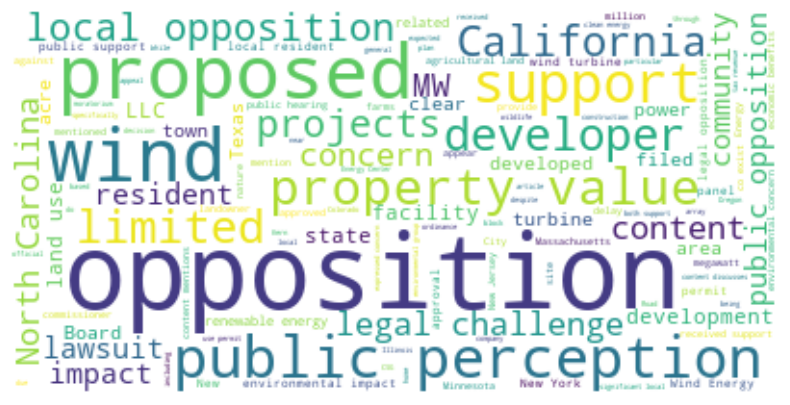

<Figure size 640x480 with 0 Axes>

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
# joined_data = pd.read_pickle("full_dataset_analysis_allscores.pkl")
# Assuming 'joined_data' is a DataFrame already loaded with a 'narrative' column
narrative_text = " ".join(text for text in joined_data['narrative'].dropna())

# List of words to exclude
stopwords = set(['farm', 'solar', 'also', 'results', 'when', 'which', 'after', 'evidence', 'there', 'contain', 'any', 'specific', 'search', 'result', 'County', 'some', 'many', 'has', 'have', 'faced', 'other', 'details', 'specific details', 'does', 'over', 'not', 'no', 'relevant', 'info', 'found', 'project', 'information', 'provided', 'available', 'could', 'not', 'be', 'located', 'in', 'the', 'to', 'about', 'and', 'or', 'but', 'if', 'however', 'nevertheless', 'of', 'on', 'at', 'for', 'with', 'as', 'by', 'from', 'is', 'was', 'were', 'are', 'will', 'would', 'should', 'could', 'can', 'may', 'might', 'shall', 'must', 'a', 'an', 'the', 'this', 'that', 'these', 'those', 'it', 'its', 'they', 'their', 'them', 'he', 'his', 'she', 'her', 'hers', 'we', 'our', 'us', 'you', 'your', 'yours', 'i', 'my', 'me', 'mine', 'one'])
# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(narrative_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save to viz_dir
viz_path = opj(VIZ_DIR, "wordcloud_narrative.png")
plt.savefig(viz_path)


- TPF = Total Population - can calcaulate population density by dividing TPF by area of the geometry in square miles
- DM_B = Percent Black
- DM_W = Percent White
- DM_H = Percent Hispanic
AGE_OLD = percent above 64
AGE_MIDDLE = 10-64
TA_PERC = pct of tract in tribal areas
DBF_PFS = energy burden pct
LMI_PFS LMI pct based on AMI
UF_PFS unemployment percentage
HSEF = % 25 or older with less than hs degree

In [4]:
import pandas as pd
joined_data = pd.read_pickle("full_dataset_analysis_allscores.pkl")

In [5]:
# load usa.pkl
import pickle
with open("demographic_data/1.0-shapefile-codebook/usa/usa.pkl", "rb") as f:
    usa_df = pickle.load(f)

# add a new column to usa_df with the area of the tract in square miles
usa_df['area_sqmi'] = usa_df['geometry'].to_crs(epsg=5070).area / 2.59e6
# join usa_df with joined_data on "GEOID10" (JUST to get the area_sqmi from usa_df, and put it into a new column called "area_sqmi" in joined_data
joined_data_new = joined_data.merge(usa_df[['GEOID10', 'area_sqmi']], left_on='GEOID10', right_on='GEOID10', how='left')


In [31]:
joined_data_new.geometry = joined_data_new.tract_geometry

In [9]:
import numpy as np
import geopandas as gpd
from scipy.stats import ttest_ind

joined_data_new['area_sqmi'] = joined_data_new['area_sqmi'].replace(0, np.nan)  # Replace zero areas with NaN to avoid division errors later
# Calculate population density, handling division by zero or very small areas
joined_data_new['Population Density'] = joined_data_new['TPF'] / joined_data_new['area_sqmi'].replace(0, np.nan)
# Define the columns of interest and their readable labels
columns_of_interest = {
    'Population Density': 'Population Density (per sq mile)',
    'DM_B': 'Percent Black',
    'DM_H': 'Percent Hispanic',
    'DM_W': 'Percent White',
    'HSEF': 'Percent 25 or Older with Less Than HS Degree',
    'AGE_OLD': 'Percent Above 64',
    'AGE_MIDDLE': 'Percent Ages 10-64',
    'TA_PERC': 'Percent of Tract in Tribal Areas',
    'EBF_PFS': 'Energy Burden Percentile',
    'LMI_PFS': 'LMI Percentile Based on AMI',
    'PM25F_PFS': 'PM2.5 in the Air Percentile',
    'UF_PFS': 'Unemployment Percentile',
}



# Create a DataFrame to store the results
demographic_stats_summary = pd.DataFrame(columns=['Variables', 'Average With Opposition', 'Average Without Opposition', 't-statistic'])

# Iterate over each column to calculate means and t-statistics
for column, label in columns_of_interest.items():
    group1 = joined_data_new[joined_data_new['mention_opp'] == 1][column].dropna()
    group2 = joined_data_new[joined_data_new['mention_opp'] == 0][column].dropna()
    
    # Calculate means
    mean_with_opposition = np.mean(group1)
    mean_without_opposition = np.mean(group2)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2)
    
    # Determine significance and format t-statistic
    if p_value < 0.01:
        t_stat = f"{t_stat:.3f}***"
    elif p_value < 0.05:
        t_stat = f"{t_stat:.3f}**"
    elif p_value < 0.1:
        t_stat = f"{t_stat:.3f}*"
    else:
        t_stat = f"{t_stat:.3f}"
    
    # Use loc to add new row to the DataFrame for newer versions of pandas
    index = len(demographic_stats_summary)
    demographic_stats_summary.loc[index] = [label, f"{mean_with_opposition:.3f}", f"{mean_without_opposition:.3f}", t_stat]
    # Display the summary DataFrame
demographic_stats_summary.head(10)



Variables Average With Opposition  \
0              Population Density (per sq mile)                 300.994   
1                                 Percent Black                   0.082   
2                              Percent Hispanic                   0.135   
3                                 Percent White                   0.714   
4  Percent 25 or Older with Less Than HS Degree                   0.127   
5                              Percent Above 64                   0.179   
6                            Percent Ages 10-64                   0.693   
7              Percent of Tract in Tribal Areas                   0.151   
8                      Energy Burden Percentile                   0.665   
9                   LMI Percentile Based on AMI                   0.496   

  Average Without Opposition t-statistic  
0                    630.052   -8.691***  
1                      0.101   -4.265***  
2                      0.182   -7.786***  
3                      0.642    9.763***  
4                      0.139   -4.099***  
5                      0.163    8.617***  
6                      0.707   -7.765***  
7                      0.128       0.734  
8                      0.604    8.842***  
9                      0.485       1.567

In [10]:
# Filter data for Solar projects only
solar_data = joined_data_new[joined_data_new['tech_type'] == 'PV']

# Create a DataFrame to store the results for Solar projects
solar_stats_summary = pd.DataFrame(columns=['Variables', 'Average With Opposition', 'Average Without Opposition', 't-statistic'])

# Iterate over each column to calculate means and t-statistics for Solar projects
for column, label in columns_of_interest.items():
    group1 = solar_data[solar_data['mention_opp'] == 1][column].dropna()
    group2 = solar_data[solar_data['mention_opp'] == 0][column].dropna()
    
    # Calculate means
    mean_with_opposition = np.mean(group1)
    mean_without_opposition = np.mean(group2)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2)
    
    # Determine significance and format t-statistic
    if p_value < 0.01:
        t_stat = f"{t_stat:.3f}***"
    elif p_value < 0.05:
        t_stat = f"{t_stat:.3f}**"
    elif p_value < 0.1:
        t_stat = f"{t_stat:.3f}*"
    else:
        t_stat = f"{t_stat:.3f}"
    
    # Use loc to add new row to the DataFrame for Solar projects
    index = len(solar_stats_summary)
    solar_stats_summary.loc[index] = [label, f"{mean_with_opposition:.3f}", f"{mean_without_opposition:.3f}", t_stat]

# Filter data for Wind projects only
wind_data = joined_data_new[joined_data_new['tech_type'] == 'WT']

# Create a DataFrame to store the results for Wind projects
wind_stats_summary = pd.DataFrame(columns=['Variables', 'Average With Opposition', 'Average Without Opposition', 't-statistic'])

# Iterate over each column to calculate means and t-statistics for Wind projects
for column, label in columns_of_interest.items():
    group1 = wind_data[wind_data['mention_opp'] == 1][column].dropna()
    group2 = wind_data[wind_data['mention_opp'] == 0][column].dropna()
    
    # Calculate means
    mean_with_opposition = np.mean(group1)
    mean_without_opposition = np.mean(group2)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2)
    
    # Determine significance and format t-statistic
    if p_value < 0.01:
        t_stat = f"{t_stat:.3f}***"
    elif p_value < 0.05:
        t_stat = f"{t_stat:.3f}**"
    elif p_value < 0.1:
        t_stat = f"{t_stat:.3f}*"
    else:
        t_stat = f"{t_stat:.3f}"
    
    # Use loc to add new row to the DataFrame for Wind projects
    index = len(wind_stats_summary)
    wind_stats_summary.loc[index] = [label, f"{mean_with_opposition:.3f}", f"{mean_without_opposition:.3f}", t_stat]

# Display the summary DataFrames
print("Solar Projects Summary:")
print(solar_stats_summary)
print("\nWind Projects Summary:")
print(wind_stats_summary)


Solar Projects Summary:
                                       Variables Average With Opposition  \
0               Population Density (per sq mile)                 432.087   
1                                  Percent Black                   0.118   
2                               Percent Hispanic                   0.150   
3                                  Percent White                   0.654   
4   Percent 25 or Older with Less Than HS Degree                   0.138   
5                               Percent Above 64                   0.169   
6                             Percent Ages 10-64                   0.703   
7               Percent of Tract in Tribal Areas                   0.059   
8                       Energy Burden Percentile                   0.625   
9                    LMI Percentile Based on AMI                   0.493   
10                   PM2.5 in the Air Percentile                   0.315   
11                       Unemployment Percentile                

In [14]:
demographic_stats_summary.to_csv(viz_path('all_demographics_stats.csv'), index=False)
solar_stats_summary.to_csv(viz_path('solar_dem_stats.csv'), index=False)
wind_stats_summary.to_csv(viz_path('wind_dem_stats.csv'), index=False)


In [17]:
# Combine all summary DataFrames into one DataFrame, make sure to add prefix to the columns to distinguish between them
all_projects_summary = pd.concat([demographic_stats_summary.add_prefix('All_'),
                                  solar_stats_summary.add_prefix('Solar_'),
                                  wind_stats_summary.add_prefix('Wind_')], axis=1)
# Save the combined DataFrame to a CSV file
all_projects_summary.to_csv(viz_path('all_projects_summary.csv'), index=False)

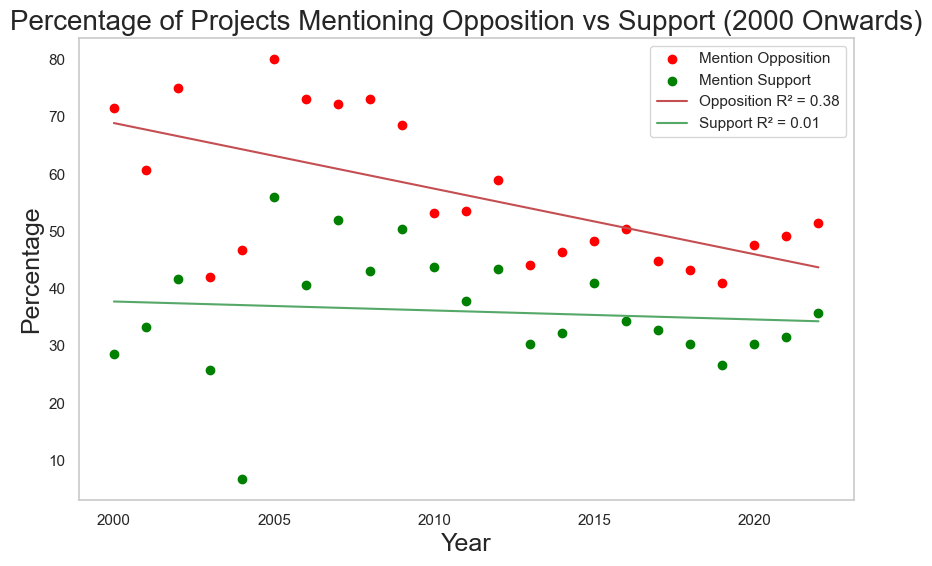

<Figure size 640x480 with 0 Axes>

In [23]:
# Filter data for projects operational from the year 2000 onwards
import numpy as np
projects_2000_onwards = joined_data[joined_data['op_year'] >= 2000]

# Calculate the percentage of projects with mention_opp_score == 1 for each year
percentage_mention_opp = projects_2000_onwards[projects_2000_onwards['mention_opp_score'] == 1].groupby('op_year').size() / projects_2000_onwards.groupby('op_year').size() * 100

# Calculate the percentage of projects with mention_support_score == 1 for each year
percentage_mention_support = projects_2000_onwards[projects_2000_onwards['mention_support_score'] == 1].groupby('op_year').size() / projects_2000_onwards.groupby('op_year').size() * 100

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(percentage_mention_opp.index, percentage_mention_opp.values, color='red', label='Mention Opposition')
plt.scatter(percentage_mention_support.index, percentage_mention_support.values, color='green', label='Mention Support')

# Fit lines and calculate R^2 values
opp_fit = np.polyfit(percentage_mention_opp.index, percentage_mention_opp.values, 1)
opp_fit_fn = np.poly1d(opp_fit)
opp_r_squared = np.corrcoef(percentage_mention_opp.index, percentage_mention_opp.values)[0, 1]**2

support_fit = np.polyfit(percentage_mention_support.index, percentage_mention_support.values, 1)
support_fit_fn = np.poly1d(support_fit)
support_r_squared = np.corrcoef(percentage_mention_support.index, percentage_mention_support.values)[0, 1]**2

# Plot lines of best fit
plt.plot(percentage_mention_opp.index, opp_fit_fn(percentage_mention_opp.index), 'r-', label=f'Opposition R² = {opp_r_squared:.2f}')
plt.plot(percentage_mention_support.index, support_fit_fn(percentage_mention_support.index), 'g-', label=f'Support R² = {support_r_squared:.2f}')

plt.title('Percentage of Projects Mentioning Opposition vs Support (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(False)
plt.show()

#Save to viz_path
viz_path = opj(VIZ_DIR, "mention_opp_support_pct_years.png")
plt.savefig(viz_path)



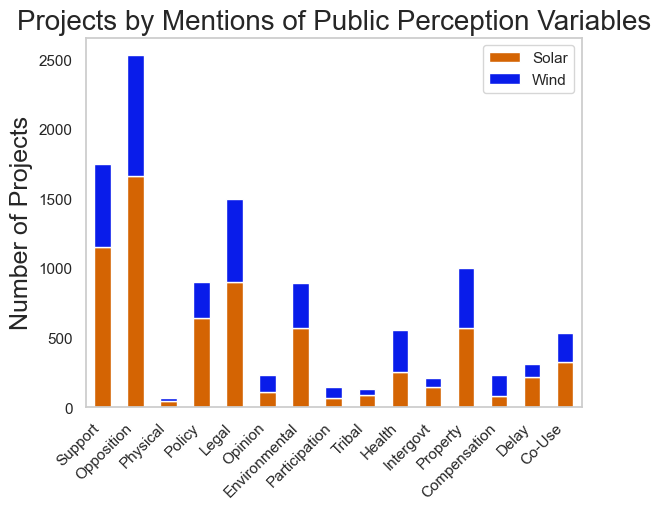

<Figure size 640x480 with 0 Axes>

In [29]:
variable_labels = {
    "mention_support_score": "Support",
    "mention_opp_score": "Opposition",
    "physical_opp": "Physical",
    "policy_opp": "Policy",
    "legal_opp": "Legal",
    "opinion_opp": "Opinion",
    "environmental_opp": "Environmental",
    "participation_opp": "Participation",
    "tribal_opp": "Tribal",
    "health_opp": "Health",
    "intergov_opp": "Intergovt",
    "property_opp": "Property",
    "compensation": "Compensation",
    "delay": "Delay",
    "co_land_use": "Co-Use"
}

# Filter data for tech_type 'PV' and 'WT'
pv_data = joined_data[joined_data['tech_type'] == 'PV']
wt_data = joined_data[joined_data['tech_type'] == 'WT']

# Initialize a dictionary to store the count of projects with score == 1 for each variable
pv_counts = {label: pv_data[var][pv_data[var] == 1].count() for var, label in variable_labels.items()}
wt_counts = {label: wt_data[var][wt_data[var] == 1].count() for var, label in variable_labels.items()}

# Create a DataFrame from the counts
pv_df = pd.DataFrame(list(pv_counts.items()), columns=['Variable', 'Solar'])
wt_df = pd.DataFrame(list(wt_counts.items()), columns=['Variable', 'Wind'])

# Merge the DataFrames
merged_df = pd.merge(pv_df, wt_df, on='Variable')

# Plotting
fig, ax = plt.subplots()
merged_df.plot(kind='bar', stacked=True, color={'Solar': '#D46403', 'Wind': '#091CEA'}, ax=ax)
ax.set_xticklabels(merged_df['Variable'], rotation=45, ha='right')
ax.set_ylabel('Number of Projects')
ax.set_title('Projects by Mentions of Public Perception Variables')
plt.grid(False)
plt.show()

# Save to viz_path
viz_path = opj(VIZ_DIR, "public_perception_vars.png")
plt.savefig(viz_path)

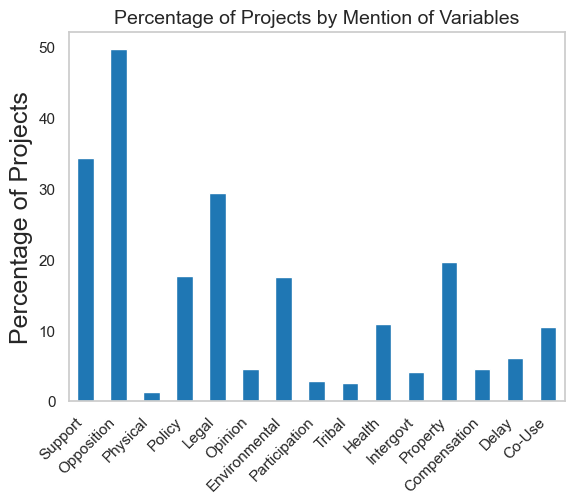

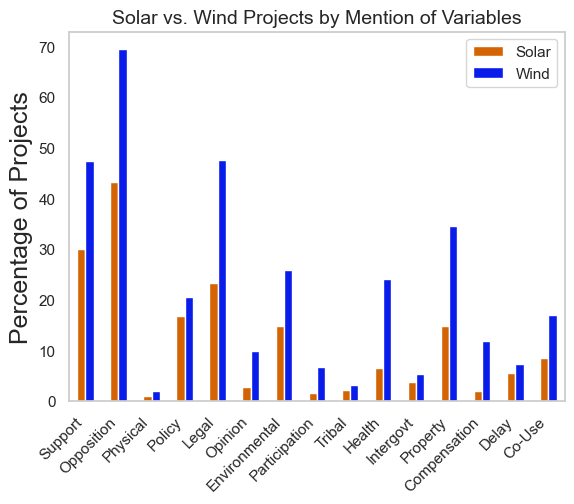

In [24]:
variable_labels = {
    "mention_support_score": "Support",
    "mention_opp_score": "Opposition",
    "physical_opp": "Physical",
    "policy_opp": "Policy",
    "legal_opp": "Legal",
    "opinion_opp": "Opinion",
    "environmental_opp": "Environmental",
    "participation_opp": "Participation",
    "tribal_opp": "Tribal",
    "health_opp": "Health",
    "intergov_opp": "Intergovt",
    "property_opp": "Property",
    "compensation": "Compensation",
    "delay": "Delay",
    "co_land_use": "Co-Use"
}

# Calculate the percentage of projects with score == 1 for each variable
total_projects = len(joined_data_new)
pv_projects = joined_data_new[joined_data_new['tech_type'] == 'PV']
wt_projects = joined_data_new[joined_data_new['tech_type'] == 'WT']

# Calculate counts for each variable for all, PV, and WT
all_counts = {label: (joined_data_new[var] == 1).sum() / total_projects * 100 for var, label in variable_labels.items()}
pv_counts = {label: (pv_projects[var] == 1).sum() / len(pv_projects) * 100 for var, label in variable_labels.items()}
wt_counts = {label: (wt_projects[var] == 1).sum() / len(wt_projects) * 100 for var, label in variable_labels.items()}

# Create DataFrames from the counts
all_df = pd.DataFrame(list(all_counts.items()), columns=['Variable', 'Percentage'])
pv_df = pd.DataFrame(list(pv_counts.items()), columns=['Variable', 'Solar'])
wt_df = pd.DataFrame(list(wt_counts.items()), columns=['Variable', 'Wind'])

# Plotting the overall percentage of projects with score == 1
fig, ax = plt.subplots()
all_df.plot(kind='bar', ax=ax, color='#1f77b4', legend=False)
ax.set_xticklabels(all_df['Variable'], rotation=45, ha='right')
ax.set_ylabel('Percentage of Projects')
ax.set_title('Percentage of Projects by Mention of Variables', fontsize=14)
plt.grid(False)
plt.show()

# Plotting side-by-side bar graph for Solar and Wind
merged_df = pd.merge(pv_df, wt_df, on='Variable')
fig, ax = plt.subplots()
merged_df.plot(kind='bar', ax=ax, color={'Solar': '#D46403', 'Wind': '#091CEA'})
ax.set_xticklabels(merged_df['Variable'], rotation=45, ha='right')
ax.set_ylabel('Percentage of Projects')
ax.set_title('Solar vs. Wind Projects by Mention of Variables', fontsize=14)
plt.grid(False)
plt.show()



In [30]:
# Save joined_data_new as pickle
joined_data_new.to_pickle("dataset_analysis_allscores.pkl")

In [1]:
# import joined_data_new
import pandas as pd
joined_data_new = pd.read_pickle("dataset_analysis_allscores.pkl")

Optimization terminated successfully.
         Current function value: 0.315286
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:      mention_opp_score   No. Observations:                 5095
Model:                         Probit   Df Residuals:                     5068
Method:                           MLE   Df Model:                           26
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.5451
Time:                        11:15:57   Log-Likelihood:                -1606.4
converged:                       True   LL-Null:                       -3531.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1973      0.669     -1.791      0.073      -2.508       0.

In [57]:
variable_labels = {
    'Population Density': 'Population Density (per sq mile)',
    'DM_B': 'Percent Black',
    'DM_H': 'Percent Hispanic',
    'DM_W': 'Percent White',
    'HSEF': 'Percent 25 or Older with Less Than HS Degree',
    'AGE_OLD': 'Percent Above 64',
    'AGE_MIDDLE': 'Percent Ages 10-64',
    'TA_PERC': 'Percent of Tract in Tribal Areas',
    'EBF_PFS': 'Energy Burden Percentile',
    'LMI_PFS': 'LMI Percentile Based on AMI',
    'PM25F_PFS': 'PM2.5 in the Air Percentile',
    'UF_PFS': 'Unemployment Percentile',
    "mention_support_score": "Support",
    "mention_opp_score": "Opposition",
    "physical_opp": "Physical",
    "policy_opp": "Policy",
    "legal_opp": "Legal",
    "opinion_opp": "Opinion",
    "environmental_opp": "Environmental",
    "participation_opp": "Participation",
    "tribal_opp": "Tribal",
    "health_opp": "Health",
    "intergov_opp": "Intergovt",
    "property_opp": "Property",
    "compensation": "Compensation",
    "delay": "Delay",
    "co_land_use": "Co-Use"
}

# Rename columns using variable_labels for readability
joined_data_new.rename(columns=variable_labels, inplace=True)
import statsmodels.api as sm

# Prepare the data for linear regression
numeric_columns = ['Support', 'Physical', 'Policy', 'Legal', 'Opinion', 'Environmental', 'Participation', 'Tribal', 'Health', 
                   'Intergovt', 'Property', 'Compensation', 'Delay', 'Co-Use', 
                   'Population Density (per sq mile)', 'Percent Black', 'Percent Hispanic', 'Percent White', 
                   'Percent 25 or Older with Less Than HS Degree', 'Percent Above 64', 'Percent Ages 10-64', 
                   'Energy Burden Percentile', 'LMI Percentile Based on AMI', 'PM2.5 in the Air Percentile', 
                   'Unemployment Percentile', 'capacity']

X = joined_data_new[numeric_columns].fillna(joined_data_new[numeric_columns].mean())

y = joined_data_new['Opposition'].fillna(0)  # Fill NaNs in y with zero
# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the probit regression model
model = sm.Probit(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

# Prepare the data for another probit regression including all specified demographic variables and capacity
numeric_columns = ['Population Density (per sq mile)', 'Percent Black', 'Percent Hispanic', 'Percent White', 
                   'Percent 25 or Older with Less Than HS Degree', 'Percent Above 64', 'Percent Ages 10-64', 
                   'Energy Burden Percentile', 'LMI Percentile Based on AMI', 'PM2.5 in the Air Percentile', 
                   'Unemployment Percentile', 'capacity']
X_full_demo = joined_data_new[numeric_columns].fillna(joined_data_new[numeric_columns].mean())
y_full_demo = joined_data_new['Opposition'].fillna(0)  # Fill NaNs in y with mean

# Add a constant to the model (the intercept)
X_full_demo = sm.add_constant(X_full_demo)

# Fit the probit regression model with the full set of demographic variables and capacity
model_full_demo = sm.Probit(y_full_demo, X_full_demo).fit()

# Print out the statistics for the full demographic model
model_full_demo_summary = model_full_demo.summary()
print(model_full_demo_summary)

# Prepare the data for probit regression with additional variables: Compensation, Delay, and Co-Use
extended_numeric_columns = ['Population Density (per sq mile)', 'Percent Black', 'Percent Hispanic', 'Percent White', 
                            'Percent 25 or Older with Less Than HS Degree', 'Percent Above 64', 'Percent Ages 10-64', 
                            'Energy Burden Percentile', 'LMI Percentile Based on AMI', 'PM2.5 in the Air Percentile', 
                            'Unemployment Percentile', 'capacity', 'Compensation', 'Delay', 'Co-Use']

# Fill NaN values with the mean of each column before regression analysis
X_extended = joined_data_new[extended_numeric_columns].fillna(joined_data_new[extended_numeric_columns].mean())
y_extended = joined_data_new['Opposition'].fillna(0)  # Fill NaNs in y with mean

# Add a constant to the model (the intercept)
X_extended = sm.add_constant(X_extended)

# Fit the probit regression model with the extended set of variables
model_extended = sm.Probit(y_extended, X_extended).fit()

# Print out the statistics for the extended model
model_extended_summary = model_extended.summary()
print(model_extended_summary)

# Save the model extended summary to a text file
with open('visualizations/probit_model_extended_summary.txt', 'w') as file:
    file.write(model_extended_summary.as_text())

# Save model_extended_summary as csv
model_extended_summary_as_csv = model_extended_summary.tables[1].as_csv()
with open('visualizations/probit_model_extended_summary.csv', 'w') as file:
    file.write(model_extended_summary_as_csv)


Optimization terminated successfully.
         Current function value: 0.315286
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:             Opposition   No. Observations:                 5095
Model:                         Probit   Df Residuals:                     5068
Method:                           MLE   Df Model:                           26
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.5451
Time:                        11:20:45   Log-Likelihood:                -1606.4
converged:                       True   LL-Null:                       -3531.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                   

In [56]:
# Calculate Pearson correlation coefficient between 'mention_opp_score' and 'compensation'
pearson_coeff_compensation = joined_data_new['mention_opp_score'].corr(joined_data_new['compensation'])
print("Pearson correlation coefficient between 'mention_opp_score' and 'compensation':", pearson_coeff_compensation)

# Calculate Pearson correlation coefficient between 'mention_opp_score' and 'co_land_use'
pearson_coeff_co_land_use = joined_data_new['mention_opp_score'].corr(joined_data_new['co_land_use'])
print("Pearson correlation coefficient between 'mention_opp_score' and 'co_land_use':", pearson_coeff_co_land_use)


Pearson correlation coefficient between 'mention_opp_score' and 'compensation': 0.16240755675125926
Pearson correlation coefficient between 'mention_opp_score' and 'co_land_use': 0.14603164738874597


In [19]:
# Calculate the percentage of projects with mention_opp_score = 1
mention_opp_score_1_percentage = (joined_data_new['mention_opp_score'] == 1).mean() * 100
print(f"Percentage of projects with mention_opp_score = 1: {mention_opp_score_1_percentage:.2f}%")

# Calculate the percentage of projects with mention_support_score = 1
mention_support_score_1_percentage = (joined_data_new['mention_support_score'] == 1).mean() * 100
print(f"Percentage of projects with mention_support_score = 1: {mention_support_score_1_percentage:.2f}%")
# how many projects in the dataset
num_projects = joined_data_new.shape[0]
print(f"Number of projects in the dataset: {num_projects}")



Percentage of projects with mention_opp_score = 1: 49.68%
Percentage of projects with mention_support_score = 1: 34.31%
Number of projects in the dataset: 5095


In [26]:
# Calculate the percentage of projects with mention_opp_score == 1 and mention_support_score == 1
opp_1_support_1 = joined_data_new[(joined_data_new['mention_opp_score'] == 1) & (joined_data_new['mention_support_score'] == 1)].shape[0]
total_opp_1 = joined_data_new[joined_data_new['mention_opp_score'] == 1].shape[0]
percentage_opp_1_support_1 = (opp_1_support_1 / total_opp_1) * 100 if total_opp_1 != 0 else 0
print(f"Percentage of projects with mention_opp_score = 1 and mention_support_score = 1: {percentage_opp_1_support_1:.2f}%")

# Calculate the percentage of projects with mention_opp_score == 0 and mention_support_score == 1
opp_0_support_1 = joined_data_new[(joined_data_new['mention_opp_score'] == 0) & (joined_data_new['mention_support_score'] == 1)].shape[0]
total_opp_0 = joined_data_new[joined_data_new['mention_opp_score'] == 0].shape[0]
percentage_opp_0_support_1 = (opp_0_support_1 / total_opp_0) * 100 if total_opp_0 != 0 else 0
print(f"Percentage of projects with mention_opp_score = 0 and mention_support_score = 1: {percentage_opp_0_support_1:.2f}%")

# Calculate Pearson correlation coefficient between 'mention_opp_score' and 'mention_support_score'
pearson_coeff_support_opp = joined_data_new['mention_opp_score'].corr(joined_data_new['mention_support_score'])
print("Pearson correlation coefficient between 'mention_opp_score' and 'mention_support_score':", pearson_coeff_support_opp)



Percentage of projects with mention_opp_score = 1 and mention_support_score = 1: 43.58%
Percentage of projects with mention_opp_score = 0 and mention_support_score = 1: 26.01%
Pearson correlation coefficient between 'mention_opp_score' and 'mention_support_score': 0.18433283063058017


In [37]:
import geopandas as gpd

# Load demographic data
state_data = gpd.read_file("zip://demographic_data/cb_2023_us_state_20m.zip")
state_data.head()

STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0      48  01779801  0400000US48    48     TX       Texas   00  676686238592   
1      06  01779778  0400000US06    06     CA  California   00  403673296401   
2      21  01779786  0400000US21    21     KY    Kentucky   00  102266598312   
3      13  01705317  0400000US13    13     GA     Georgia   00  149485311347   
4      55  01779806  0400000US55    55     WI   Wisconsin   00  140292627460   

        AWATER                                           geometry  
0  18982083586  POLYGON ((-106.62345 31.91403, -106.63011 31.9...  
1  20291770234  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...  
2   2384223544  POLYGON ((-89.54443 36.57451, -89.47935 36.566...  
3   4419673221  POLYGON ((-85.60516 34.98468, -85.47434 34.983...  
4  29343084365  MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...

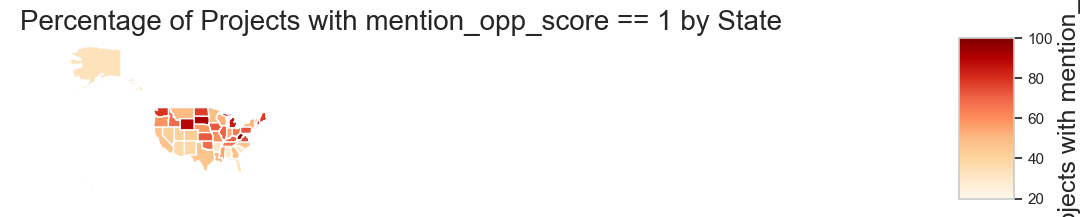

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Calculate the percentage of projects with mention_opp_score == 1 for each state
state_opp_score = joined_data_new.groupby('state').apply(
    lambda x: (x['mention_opp_score'] == 1).mean() * 100
)

# Use the state_data which is a GeoDataFrame with geometry for each state
# Ensure the 'state' column in joined_data_new matches the 'STUSPS' column in state_data
state_opp_score.name = 'percentage_opp_score_1'
state_data = state_data.set_index('STUSPS')
state_data = state_data.join(state_opp_score, on='STUSPS')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
state_data.plot(column='percentage_opp_score_1', ax=ax, legend=True, cax=cax, cmap='OrRd',
                legend_kwds={'label': "Percentage of Projects with mention_opp_score == 1"})
ax.set_title('Percentage of Projects with mention_opp_score == 1 by State')
ax.set_axis_off()
plt.show()


In [50]:
import folium
from branca.colormap import linear

# Calculate the percentage of projects with mention_opp_score == 1 for each state
state_opp_score = joined_data_new[joined_data_new['mention_opp_score'] == 1].groupby('state').size() / joined_data_new.groupby('state').size() * 100
state_opp_score = state_opp_score.reset_index(name='percentage_opp_score_1')
print(state_opp_score.head())

# Load the GeoJSON data for the US states
state_data = gpd.read_file("zip://demographic_data/cb_2023_us_state_20m.zip")
print(state_data.head())

# Join state_data and state_opp_score on 'STUSPS' and 'state' respectively without setting them as index
state_data = state_data.merge(state_opp_score, left_on='STUSPS', right_on='state')

# Drop any rows with NaN values in 'percentage_opp_score_1' to avoid issues with the colormap
state_data = state_data.dropna(subset=['percentage_opp_score_1'])

# Create a folium map centered on the US
m = folium.Map(location=[48, -102], zoom_start=5)

# Define a color scale, ensuring no None values are present
colormap = linear.OrRd_09.scale(state_data['percentage_opp_score_1'].min(), state_data['percentage_opp_score_1'].max())

# Add the GeoData to the map
folium.GeoJson(
    state_data.to_json(),
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['percentage_opp_score_1']) if feature['properties']['percentage_opp_score_1'] is not None else 'transparent',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['STUSPS', 'percentage_opp_score_1'],
        aliases=['State', 'Percentage of Projects with mention_opp_score == 1'],
        localize=True
    )
).add_to(m)

# Add the color scale
colormap.caption = 'Percentage of Projects with Opposition Mentioned by State'
colormap.add_to(m)

# Display the map
m
# save as png and html in viz_path
viz_path = opj(VIZ_DIR, "map_mention_opp_score.html")
m.save(viz_path)
m_png = m._to_png(5)
with open(opj(VIZ_DIR, 'map_mention_opp_score.png'), 'wb') as f:
    f.write(m_png)


  state  percentage_opp_score_1
0    AK               33.333333
1    AL               28.571429
2    AR               30.000000
3    AZ               37.349398
4    CA               46.764706
  STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0      48  01779801  0400000US48    48     TX       Texas   00  676686238592   
1      06  01779778  0400000US06    06     CA  California   00  403673296401   
2      21  01779786  0400000US21    21     KY    Kentucky   00  102266598312   
3      13  01705317  0400000US13    13     GA     Georgia   00  149485311347   
4      55  01779806  0400000US55    55     WI   Wisconsin   00  140292627460   

        AWATER                                           geometry  
0  18982083586  POLYGON ((-106.62345 31.91403, -106.63011 31.9...  
1  20291770234  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...  
2   2384223544  POLYGON ((-89.54443 36.57451, -89.47935 36.566...  
3   4419673221  POLYGON ((-85.60516 34.98468, -85.47434

In [58]:
import pandas as pd
final_df_all = pd.read_csv("/Users/anushreechaudhuri/pCloud Drive/MIT/MIT Work/Renewable Energy UROP/EnergyNLP/final_dataframe_2.csv")
final_df_all.head()

/var/folders/m5/0x0gwbxx1kz02qrmghysp2mw0000gn/T/ipykernel_16033/2259964726.py:2: DtypeWarning: Columns (4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,27,29,30,31,37,38,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,58,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,84,85,86,87,88,89,90,91,92,93,94,96,97,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,138,139,140,141,142,143,144,146,147,148,149,150,151,152,153,154,155,156,157,159,160,161,168,169,172,173,174,175,176,177,178,179,180,181,183,184,187,188,189,191,192,193,194,195,196,197,198,205,206,207,208,209,210,211,212,213,214,215,216,217,218,220,221,222,223,224,225,226,227,231,233,235,236,238,240) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df_all = pd.read_csv("/Users/anushreechaudhuri/pCloud Drive/MIT/MIT Work/Renewable Energy UROP/EnergyNLP/final_dataframe_2.csv")


utility_id  plant_code generator_id ownership status primemover  \
0        20.0     55454.0         GT01         S      P        NaN   
1        20.0     55454.0         GT02         S      P        NaN   
2        20.0     55454.0         GT03         S      P        NaN   
3        46.0     55631.0            1         S      P        NaN   
4        46.0     55631.0            2         S      P        NaN   

   nameplate_capacity summer_capacity winter_capacity ensource1  ...  \
0               191.2           156.0           175.0        NG  ...   
1               191.2           156.0           175.0        NG  ...   
2               191.2           156.0           175.0        NG  ...   
3               180.0           172.0           177.0        NG  ...   
4               180.0           172.0           177.0        NG  ...   

  number_of_turbines turbines_or_hydrokinetic_buoys multiple_fuels?  \
0                NaN                            NaN             NaN   
1                NaN                            NaN             NaN   
2                NaN                            NaN             NaN   
3                NaN                            NaN             NaN   
4                NaN                            NaN             NaN   

  east_west_fixed_tilt? tilt_angle net_metering_agreement?  \
0                   NaN        NaN                     NaN   
1                   NaN        NaN                     NaN   
2                   NaN        NaN                     NaN   
3                   NaN        NaN                     NaN   
4                   NaN        NaN                     NaN   

  net_metering_dc_capacity_(mw) virtual_net_metering_agreement?  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                           NaN                             NaN   

  virtual_net_metering_dc_capacity_(mw) azimuth_angle  
0                                   NaN           NaN  
1                                   NaN           NaN  
2                                   NaN           NaN  
3                                   NaN           NaN  
4                                   NaN           NaN  

[5 rows x 243 columns]

In [60]:
# number of projects in final_df_all where primemover==WT or PV with unique plant_code
num_projects = final_df_all[final_df_all['primemover'].isin(['WT', 'PV'])]['plant_code'].nunique()
print(f"Number of projects with 'primemover' == 'WT' or 'PV': {num_projects}")

Number of projects with 'primemover' == 'WT' or 'PV': 637


In [ ]:
# print number of unique plant codes